In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings("ignore")

In [4]:
df_billboard = pd.read_csv('sample_data/hottest_50_1960_2022_new.csv')
df_billboard.head()

,date,title,artist,rank,last_week,peak,weeks,year,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genres
0,1960-04-18,Running Bear,Johnny Preston,91,81,1,27,1960,0.610,0.688,...,-9.308,1.0,0.0357,0.573,0.000000,0.164,0.761,119.831,165893.0,['nashville sound']
1,1960-11-07,Finger Poppin' Time,Hank Ballard And The Midnighters,69,57,7,26,1960,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,1960-02-15,Mack The Knife,Bobby Darin,76,59,1,26,1960,0.549,0.529,...,-12.291,0.0,0.1080,0.760,0.000000,0.206,0.464,82.755,184333.0,"['adult standards', 'brill building pop', 'eas..."
3,1960-05-30,Sweet Nothin's,Brenda Lee,63,32,4,24,1960,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,1960-07-11,Sixteen Reasons,Connie Stevens,61,40,3,24,1960,0.339,0.406,...,-8.955,1.0,0.0319,0.865,0.000011,0.110,0.619,109.783,118133.0,['deep adult standards']


In [5]:
# Define conditions for each tier
conditions = [
    (df_billboard['peak'] <= 10) & (df_billboard['weeks'] >= 10),  # Tier 1
    (df_billboard['peak'] <= 50) & (df_billboard['weeks'] >= 5),    # Tier 2
    (df_billboard['peak'] <= 100) & (df_billboard['weeks'] >= 3)    # Tier 3
]

# Create corresponding tier values
tiers = ['Tier 1', 'Tier 2', 'Tier 3']

# Apply conditions using numpy.select (handles cases that don't meet any condition)
df_billboard['tier'] = np.select(conditions, tiers, default='Other')

# Show distribution of tiers
print(df_billboard['tier'].value_counts())

# Display sample with new column
df_billboard.head(5)

tier
Tier 1    2394
Tier 2     739
Tier 3      17
Name: count, dtype: int64


,date,title,artist,rank,last_week,peak,weeks,year,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genres,tier
0,1960-04-18,Running Bear,Johnny Preston,91,81,1,27,1960,0.610,0.688,...,1.0,0.0357,0.573,0.000000,0.164,0.761,119.831,165893.0,['nashville sound'],Tier 1
1,1960-11-07,Finger Poppin' Time,Hank Ballard And The Midnighters,69,57,7,26,1960,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],Tier 1
2,1960-02-15,Mack The Knife,Bobby Darin,76,59,1,26,1960,0.549,0.529,...,0.0,0.1080,0.760,0.000000,0.206,0.464,82.755,184333.0,"['adult standards', 'brill building pop', 'eas...",Tier 1
3,1960-05-30,Sweet Nothin's,Brenda Lee,63,32,4,24,1960,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],Tier 1
4,1960-07-11,Sixteen Reasons,Connie Stevens,61,40,3,24,1960,0.339,0.406,...,1.0,0.0319,0.865,0.000011,0.110,0.619,109.783,118133.0,['deep adult standards'],Tier 1


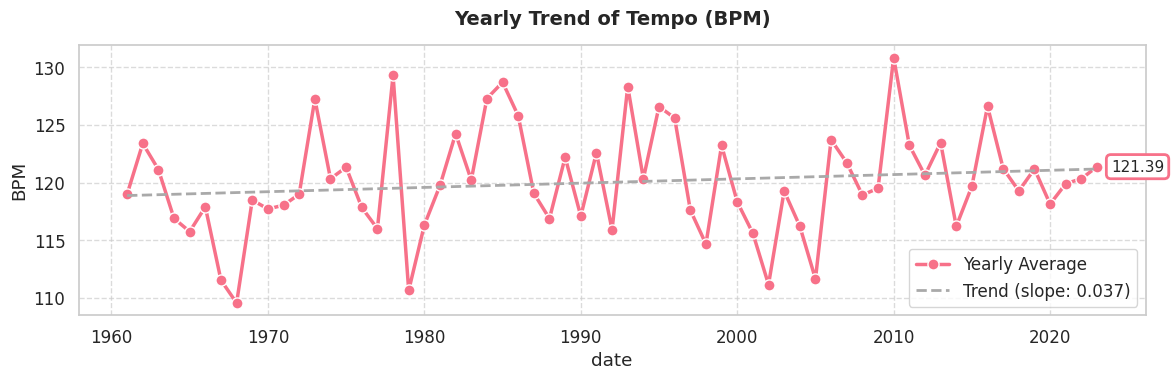

In [13]:
# Tempo Trend Chart
feature = 'tempo'
title = 'Tempo (BPM)'
ylabel = 'BPM'
color = sns.color_palette("husl", 3)[0]

x = yearly_avg.index.year
x_num = np.arange(len(x))
y = yearly_avg[feature]
coeffs = np.polyfit(x_num, y, 1)
trend_line = np.poly1d(coeffs)

plt.figure(figsize=(12, 4))
sns.lineplot(x=yearly_avg.index, y=y, color=color, linewidth=2.5, marker='o',
             markersize=8, markeredgecolor='white', markeredgewidth=1, label='Yearly Average')
plt.plot(yearly_avg.index, trend_line(x_num), '--', color='darkgray', linewidth=2,
         label=f'Trend (slope: {coeffs[0]:.3f})')

plt.title(f'Yearly Trend of {title}', fontsize=14, fontweight='bold', pad=15)
plt.ylabel(ylabel)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

last_val = y.iloc[-1]
plt.annotate(f'{last_val:.2f}', xy=(yearly_avg.index[-1], last_val),
             xytext=(10, 0), textcoords='offset points', ha='left', va='center',
             fontsize=11, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=2))

plt.tight_layout()
plt.show()


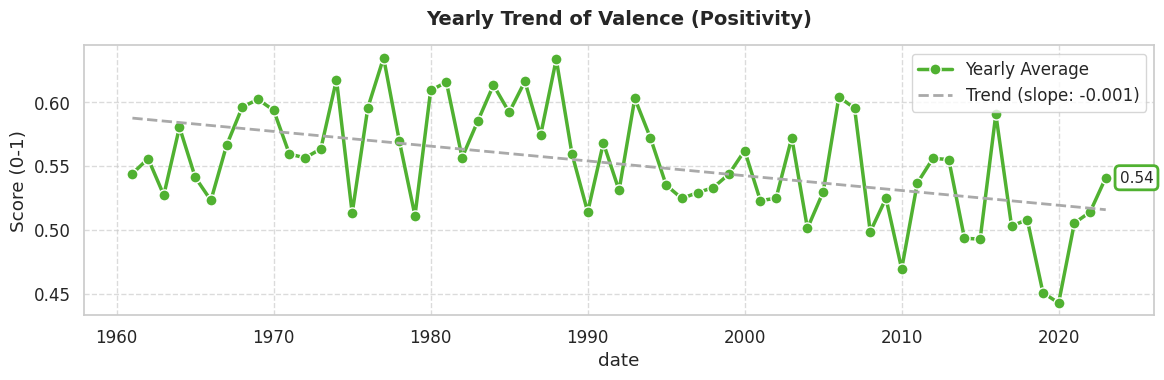

In [14]:
# Valence Trend Chart
feature = 'valence'
title = 'Valence (Positivity)'
ylabel = 'Score (0-1)'
color = sns.color_palette("husl", 3)[1]

x = yearly_avg.index.year
x_num = np.arange(len(x))
y = yearly_avg[feature]
coeffs = np.polyfit(x_num, y, 1)
trend_line = np.poly1d(coeffs)

plt.figure(figsize=(12, 4))
sns.lineplot(x=yearly_avg.index, y=y, color=color, linewidth=2.5, marker='o',
             markersize=8, markeredgecolor='white', markeredgewidth=1, label='Yearly Average')
plt.plot(yearly_avg.index, trend_line(x_num), '--', color='darkgray', linewidth=2,
         label=f'Trend (slope: {coeffs[0]:.3f})')

plt.title(f'Yearly Trend of {title}', fontsize=14, fontweight='bold', pad=15)
plt.ylabel(ylabel)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

last_val = y.iloc[-1]
plt.annotate(f'{last_val:.2f}', xy=(yearly_avg.index[-1], last_val),
             xytext=(10, 0), textcoords='offset points', ha='left', va='center',
             fontsize=11, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=2))

plt.tight_layout()
plt.show()


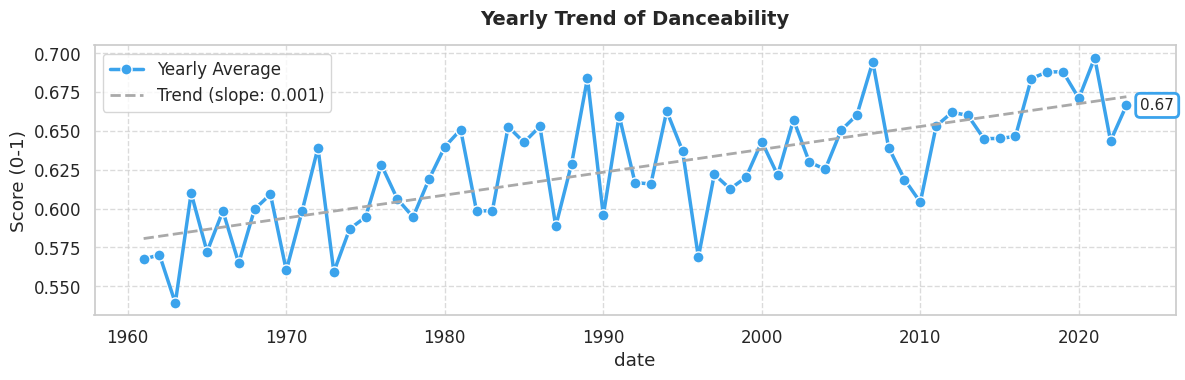

In [15]:
# Danceability Trend Chart
feature = 'danceability'
title = 'Danceability'
ylabel = 'Score (0-1)'
color = sns.color_palette("husl", 3)[2]

x = yearly_avg.index.year
x_num = np.arange(len(x))
y = yearly_avg[feature]
coeffs = np.polyfit(x_num, y, 1)
trend_line = np.poly1d(coeffs)

plt.figure(figsize=(12, 4))
sns.lineplot(x=yearly_avg.index, y=y, color=color, linewidth=2.5, marker='o',
             markersize=8, markeredgecolor='white', markeredgewidth=1, label='Yearly Average')
plt.plot(yearly_avg.index, trend_line(x_num), '--', color='darkgray', linewidth=2,
         label=f'Trend (slope: {coeffs[0]:.3f})')

plt.title(f'Yearly Trend of {title}', fontsize=14, fontweight='bold', pad=15)
plt.ylabel(ylabel)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

last_val = y.iloc[-1]
plt.annotate(f'{last_val:.2f}', xy=(yearly_avg.index[-1], last_val),
             xytext=(10, 0), textcoords='offset points', ha='left', va='center',
             fontsize=11, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=2))

plt.tight_layout()
plt.show()

In [16]:
# Prepare the data
df_billboard['date'] = pd.to_datetime(df_billboard['date'])
df_time = df_billboard.set_index('date').sort_index()

# Create resampled data
yearly_avg = df_time.resample('Y')[['energy', 'key', 'loudness']].mean()
monthly_avg = df_time.resample('M')[['energy', 'key', 'loudness']].mean().ffill()

# Set up titles, labels, and colors
features = ['energy', 'key', 'loudness']
titles = ['Energy', 'Key', 'Loudness']
ylabels = ['Score (0-1)', 'Key (0-11)', 'dB']
palette = sns.color_palette("husl", 3)

<ipython-input-16-6904c09bcc17>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = df_time.resample('Y')[['energy', 'key', 'loudness']].mean()
<ipython-input-16-6904c09bcc17>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_time.resample('M')[['energy', 'key', 'loudness']].mean().ffill()


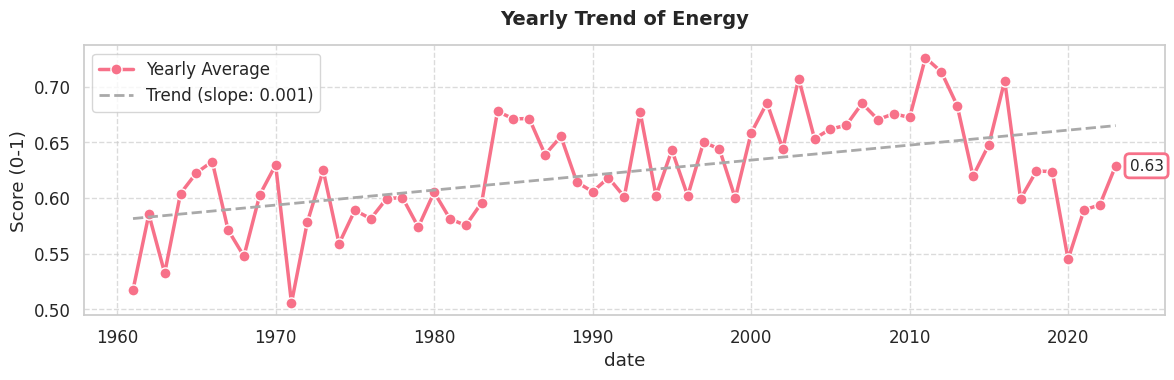

In [17]:
# Energy Trend Chart
feature = 'energy'
title = 'Energy'
ylabel = 'Score (0-1)'
color = palette[0]

x = yearly_avg.index.year
x_num = np.arange(len(x))
y = yearly_avg[feature]
coeffs = np.polyfit(x_num, y, 1)
trend_line = np.poly1d(coeffs)

plt.figure(figsize=(12, 4))
sns.lineplot(x=yearly_avg.index, y=y, color=color, linewidth=2.5, marker='o',
             markersize=8, markeredgecolor='white', markeredgewidth=1, label='Yearly Average')
plt.plot(yearly_avg.index, trend_line(x_num), '--', color='darkgray', linewidth=2,
         label=f'Trend (slope: {coeffs[0]:.3f})')

plt.title(f'Yearly Trend of {title}', fontsize=14, fontweight='bold', pad=15)
plt.ylabel(ylabel)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

last_val = y.iloc[-1]
plt.annotate(f'{last_val:.2f}', xy=(yearly_avg.index[-1], last_val),
             xytext=(10, 0), textcoords='offset points', ha='left', va='center',
             fontsize=11, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=2))

plt.tight_layout()
plt.show()

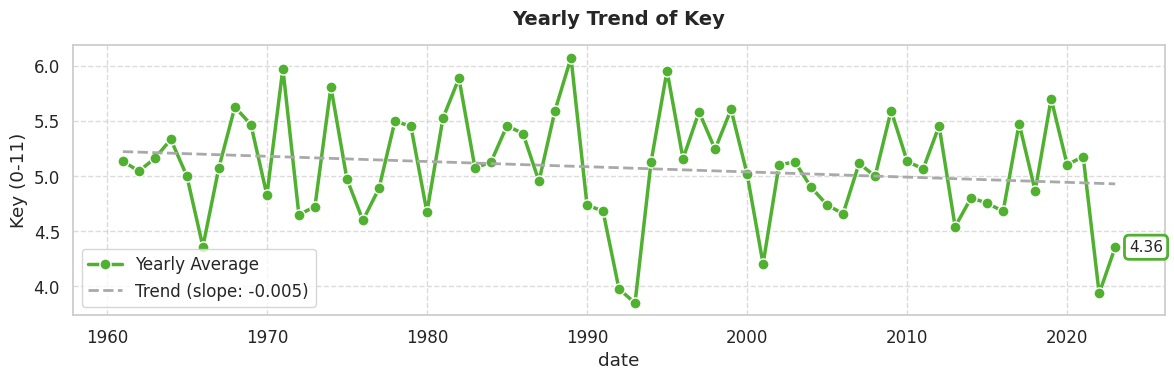

In [18]:
# Key Trend Chart
feature = 'key'
title = 'Key'
ylabel = 'Key (0-11)'
color = palette[1]

x = yearly_avg.index.year
x_num = np.arange(len(x))
y = yearly_avg[feature]
coeffs = np.polyfit(x_num, y, 1)
trend_line = np.poly1d(coeffs)

plt.figure(figsize=(12, 4))
sns.lineplot(x=yearly_avg.index, y=y, color=color, linewidth=2.5, marker='o',
             markersize=8, markeredgecolor='white', markeredgewidth=1, label='Yearly Average')
plt.plot(yearly_avg.index, trend_line(x_num), '--', color='darkgray', linewidth=2,
         label=f'Trend (slope: {coeffs[0]:.3f})')

plt.title(f'Yearly Trend of {title}', fontsize=14, fontweight='bold', pad=15)
plt.ylabel(ylabel)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

last_val = y.iloc[-1]
plt.annotate(f'{last_val:.2f}', xy=(yearly_avg.index[-1], last_val),
             xytext=(10, 0), textcoords='offset points', ha='left', va='center',
             fontsize=11, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=2))

plt.tight_layout()
plt.show()

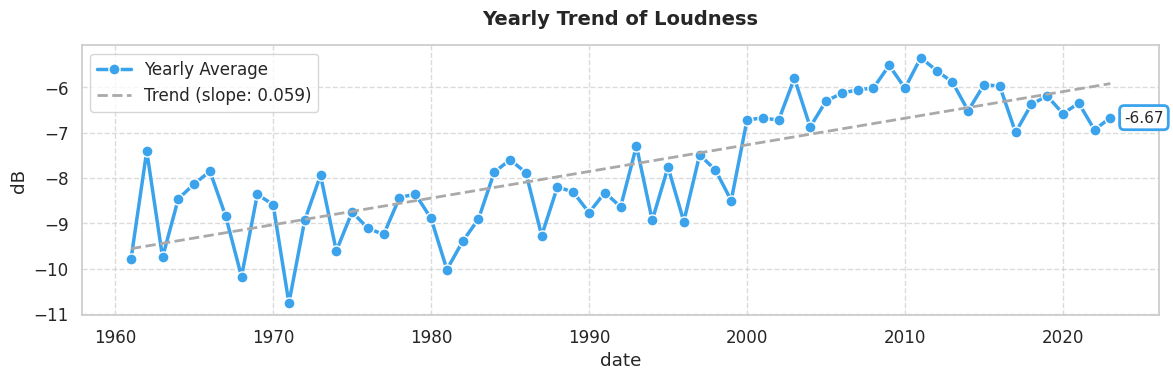

In [19]:
# Loudness Trend Chart
feature = 'loudness'
title = 'Loudness'
ylabel = 'dB'
color = palette[2]

x = yearly_avg.index.year
x_num = np.arange(len(x))
y = yearly_avg[feature]
coeffs = np.polyfit(x_num, y, 1)
trend_line = np.poly1d(coeffs)

plt.figure(figsize=(12, 4))
sns.lineplot(x=yearly_avg.index, y=y, color=color, linewidth=2.5, marker='o',
             markersize=8, markeredgecolor='white', markeredgewidth=1, label='Yearly Average')
plt.plot(yearly_avg.index, trend_line(x_num), '--', color='darkgray', linewidth=2,
         label=f'Trend (slope: {coeffs[0]:.3f})')

plt.title(f'Yearly Trend of {title}', fontsize=14, fontweight='bold', pad=15)
plt.ylabel(ylabel)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

last_val = y.iloc[-1]
plt.annotate(f'{last_val:.2f}', xy=(yearly_avg.index[-1], last_val),
             xytext=(10, 0), textcoords='offset points', ha='left', va='center',
             fontsize=11, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=2))

plt.tight_layout()
plt.show()

<ipython-input-24-181fd7c4bce9>:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = df_time.resample('Y')[['mode', 'speechiness', 'acousticness']].mean()
<ipython-input-24-181fd7c4bce9>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_time.resample('M')[['mode', 'speechiness', 'acousticness']].mean().ffill()


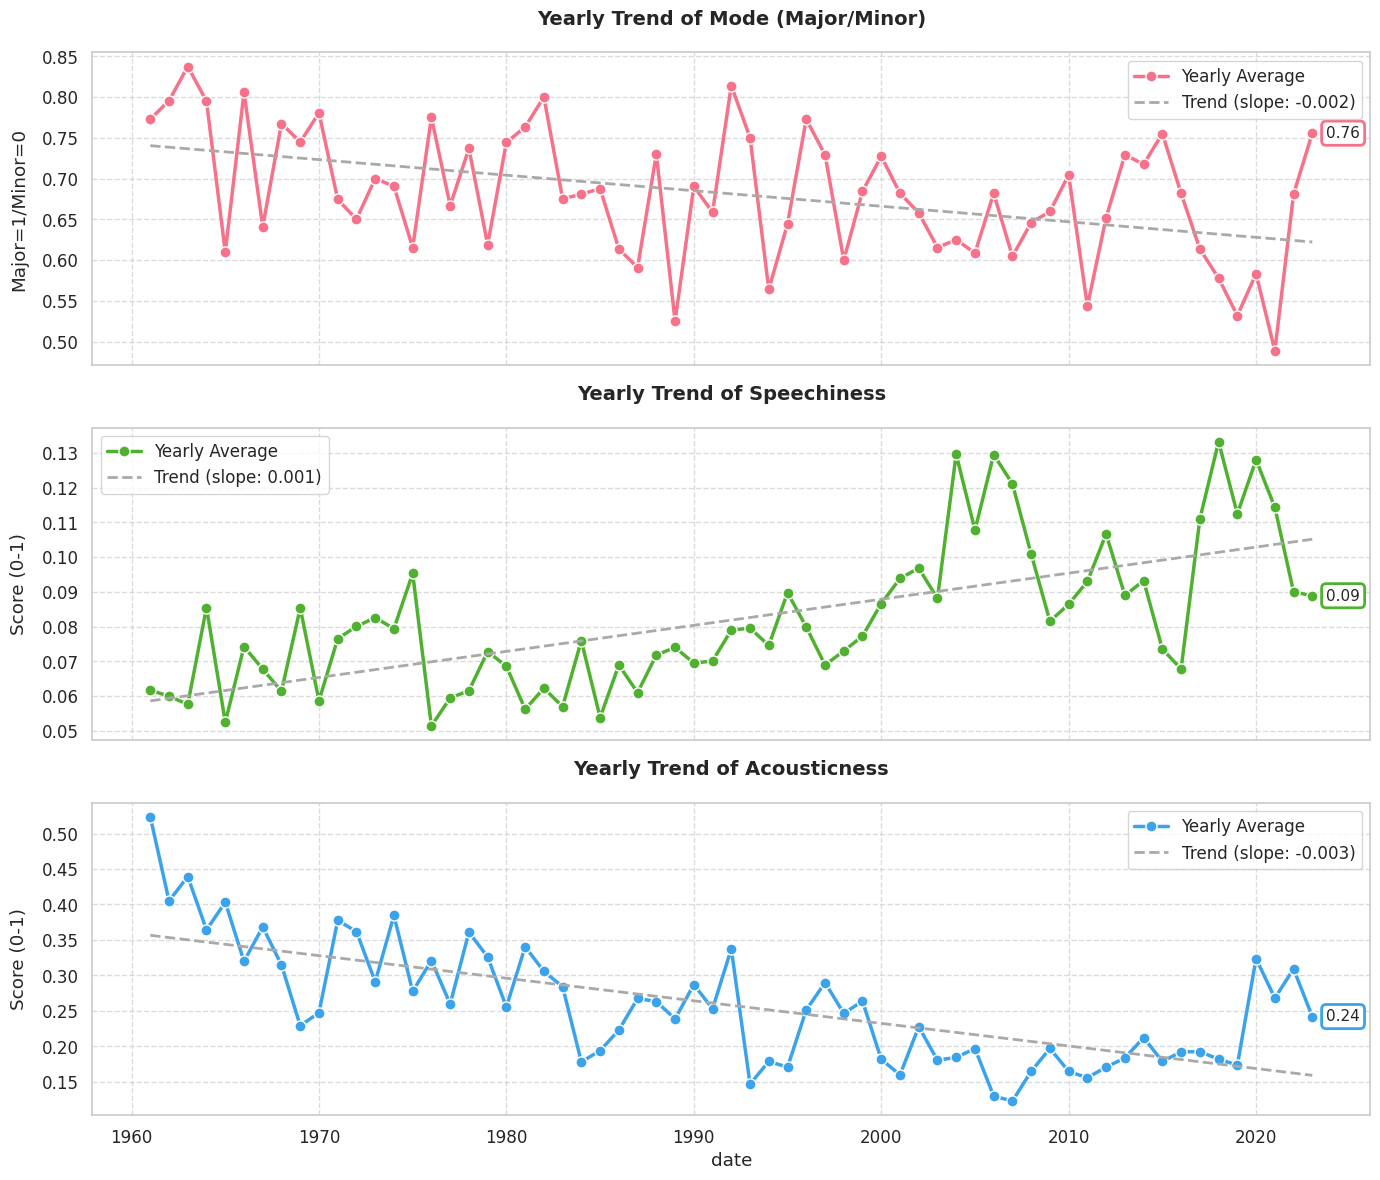

In [24]:
# Set seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Create figure with custom aesthetics
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Custom color palette
palette = sns.color_palette("husl", 3)
# Create resampled data
yearly_avg = df_time.resample('Y')[['mode', 'speechiness', 'acousticness']].mean()
monthly_avg = df_time.resample('M')[['mode', 'speechiness', 'acousticness']].mean().ffill()
# Custom color palette
palette = sns.color_palette("husl", 3)

features = ['mode', 'speechiness', 'acousticness']
titles = ['Mode (Major/Minor)', 'Speechiness', 'Acousticness']
ylabels = ['Major=1/Minor=0', 'Score (0-1)', 'Score (0-1)']

for idx, (feature, title, ylabel, color) in enumerate(zip(features, titles, ylabels, palette)):
    # Convert dates to numeric values for regression
    x = yearly_avg.index.year
    x_num = np.arange(len(x))
    y = yearly_avg[feature]

    # Calculate linear regression
    coeffs = np.polyfit(x_num, y, 1)
    trend_line = np.poly1d(coeffs)

    # Plot original data
    sns.lineplot(
        x=yearly_avg.index,
        y=yearly_avg[feature],
        ax=axes[idx],
        color=color,
        linewidth=2.5,
        marker='o',
        markersize=8,
        markeredgecolor='white',
        markeredgewidth=1,
        label='Yearly Average'
    )

    # Plot trend line
    axes[idx].plot(
        yearly_avg.index,
        trend_line(x_num),
        '--',
        color='darkgray',
        linewidth=2,
        label=f'Trend (slope: {coeffs[0]:.3f})'
    )

    axes[idx].set_title(f'Yearly Trend of {title}', pad=20, fontsize=14, fontweight='bold')
    axes[idx].set_ylabel(ylabel, labelpad=10)
    axes[idx].grid(True, linestyle='--', alpha=0.7)
    axes[idx].legend()

    # Add value annotations for last point
    last_val = yearly_avg[feature].iloc[-1]
    axes[idx].annotate(
        f'{last_val:.2f}',
        xy=(yearly_avg.index[-1], last_val),
        xytext=(10, 0),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=11,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=2)
    )

plt.tight_layout()
plt.show()

<ipython-input-25-6f2a232be395>:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = df_time.resample('Y')[['acousticness', 'instrumentalness']].mean()


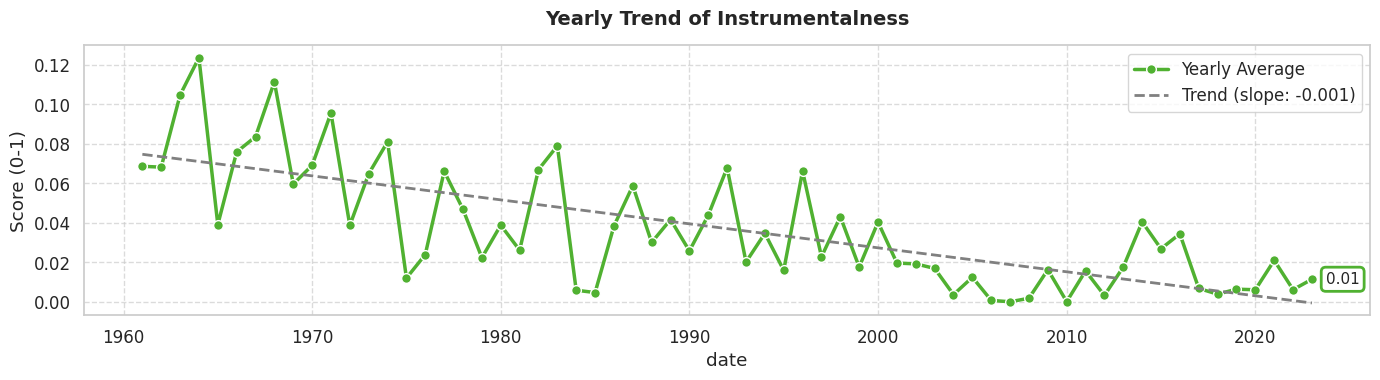

In [25]:
df_billboard['date'] = pd.to_datetime(df_billboard['date'])
df_time = df_billboard.set_index('date').sort_index()

# Resample yearly average
yearly_avg = df_time.resample('Y')[['acousticness', 'instrumentalness']].mean()


# Instrumentalness Plot
feature = 'instrumentalness'
title = 'Instrumentalness'
ylabel = 'Score (0-1)'
color = palette[1]

x = yearly_avg.index.year
x_num = np.arange(len(x))
y = yearly_avg[feature]
coeffs = np.polyfit(x_num, y, 1)
trend_line = np.poly1d(coeffs)

plt.figure(figsize=(14, 4))
sns.lineplot(x=yearly_avg.index, y=y, color=color, linewidth=2.5, marker='o',
             markersize=7, markeredgecolor='white', markeredgewidth=1, label='Yearly Average')
plt.plot(yearly_avg.index, trend_line(x_num), '--', color='gray', linewidth=2,
         label=f'Trend (slope: {coeffs[0]:.3f})')

plt.title(f'Yearly Trend of {title}', fontsize=14, fontweight='bold', pad=15)
plt.ylabel(ylabel)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

last_val = y.iloc[-1]
plt.annotate(f'{last_val:.2f}', xy=(yearly_avg.index[-1], last_val),
             xytext=(10, 0), textcoords='offset points', ha='left', va='center',
             fontsize=11, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color, lw=2))

plt.tight_layout()
plt.show()

<ipython-input-26-06c0e3992111>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = df_time.resample('Y')['duration_ms'].mean() / 1000  # Convert to seconds
<ipython-input-26-06c0e3992111>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_time.resample('M')['duration_ms'].mean().ffill() / 1000  # Convert to seconds


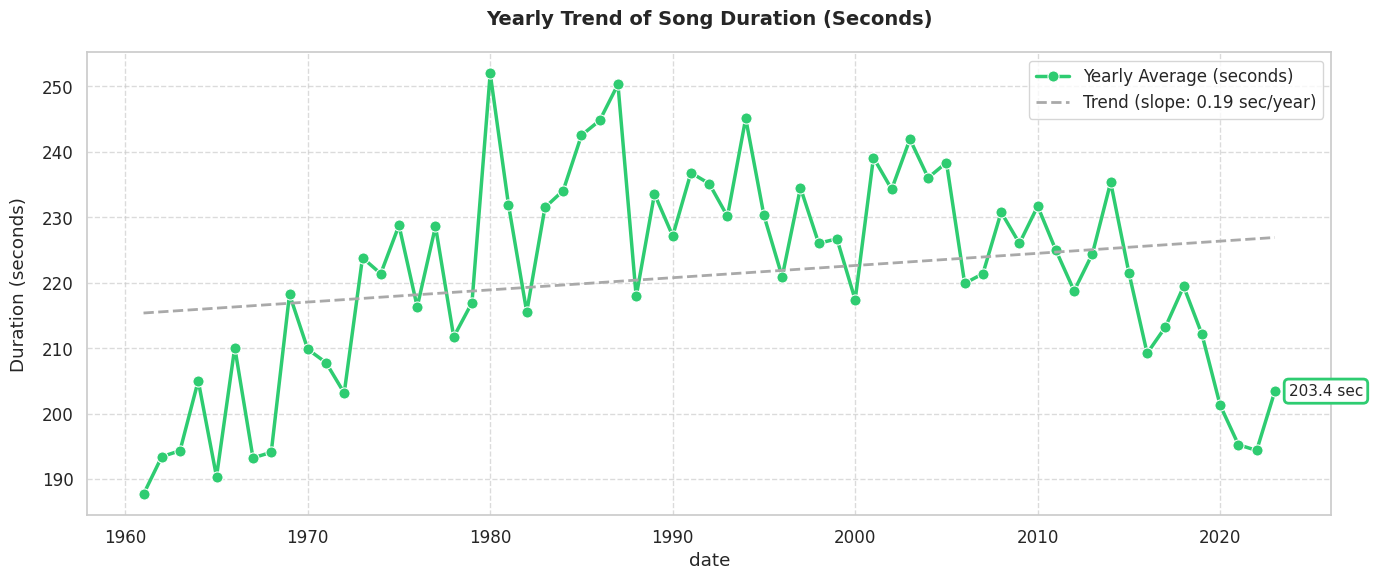

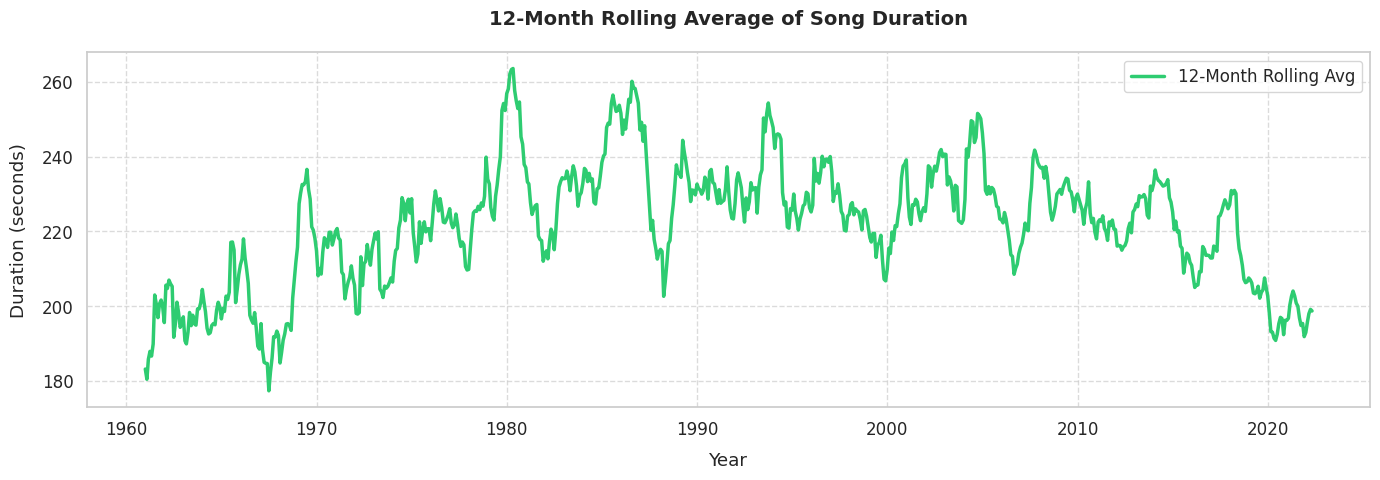

In [26]:
# Set seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Resample duration data (convert ms to seconds for readability)
yearly_avg = df_time.resample('Y')['duration_ms'].mean() / 1000  # Convert to seconds
monthly_avg = df_time.resample('M')['duration_ms'].mean().ffill() / 1000  # Convert to seconds

# Create figure
fig, ax = plt.subplots(figsize=(14, 6))

# Plot yearly average with trend line
x = yearly_avg.index.year
x_num = np.arange(len(x))
y = yearly_avg

# Linear regression
coeffs = np.polyfit(x_num, y, 1)
trend_line = np.poly1d(coeffs)

# Plot data
sns.lineplot(
    x=yearly_avg.index,
    y=yearly_avg,
    color='#2ecc71',  # Green for duration
    linewidth=2.5,
    marker='o',
    markersize=8,
    label='Yearly Average (seconds)'
)

# Plot trend
ax.plot(
    yearly_avg.index,
    trend_line(x_num),
    '--',
    color='darkgray',
    linewidth=2,
    label=f'Trend (slope: {coeffs[0]:.2f} sec/year)'
)

# Annotate last point
last_val = yearly_avg.iloc[-1]
ax.annotate(
    f'{last_val:.1f} sec',
    xy=(yearly_avg.index[-1], last_val),
    xytext=(10, 0),
    textcoords='offset points',
    ha='left',
    va='center',
    fontsize=11,
    bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='#2ecc71', lw=2)
)

# Labels and title
ax.set_title('Yearly Trend of Song Duration (Seconds)', pad=20, fontsize=14, fontweight='bold')
ax.set_ylabel('Duration (seconds)', labelpad=10)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()

# Rolling average plot
plt.figure(figsize=(14, 5))
sns.lineplot(
    x=monthly_avg.index,
    y=monthly_avg.rolling(12).mean(),
    color='#2ecc71',
    linewidth=2.5,
    label='12-Month Rolling Avg'
)

plt.title('12-Month Rolling Average of Song Duration', pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Duration (seconds)', labelpad=10)
plt.xlabel('Year', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Filter DataFrames for Tier 1 and Tier 2
tier1 = df_billboard[df_billboard['tier'] == 'Tier 1']
tier2 = df_billboard[df_billboard['tier'] == 'Tier 2']

# Select audio features to compare
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Generate descriptive stats function
def get_stats(df):
    stats = df[audio_features].describe().loc[['mean', '50%', 'std']]
    stats['duration_sec'] = stats['duration_ms'] / 1000  # Convert values
    return stats.drop('duration_ms', axis=1)

# Get stats for each tier
tier1_stats = get_stats(tier1)
tier2_stats = get_stats(tier2)

# Combine results with proper naming
comparison = pd.concat({
    'Tier 1': tier1_stats,
    'Tier 2': tier2_stats
}, axis=1)

# Reorganize multi-index for cleaner display
comparison = comparison.reorder_levels([1, 0], axis=1).sort_index(axis=1)

print("Audio Feature Comparison: Tier 1 vs. Tier 2")
comparison

Audio Feature Comparison: Tier 1 vs. Tier 2


acousticness           danceability           duration_sec              \
           Tier 1    Tier 2       Tier 1    Tier 2       Tier 1      Tier 2   
mean     0.248335  0.279460     0.632496  0.609471   221.885432  218.635025   
50%      0.144000  0.194000     0.646000  0.620000   216.600000  214.533500   
std      0.264113  0.280495     0.158928  0.155416    55.172130   55.167407   

        energy           instrumentalness            liveness            \
        Tier 1    Tier 2           Tier 1    Tier 2    Tier 1    Tier 2   
mean  0.631784  0.598758         0.030672  0.055442  0.173091  0.169361   
50%   0.659000  0.623000         0.000002  0.000002  0.117000  0.120000   
std   0.195050  0.204116         0.137513  0.194063  0.136274  0.130375   

      loudness           speechiness                 tempo              \
        Tier 1    Tier 2      Tier 1    Tier 2      Tier 1      Tier 2   
mean -7.618919 -7.931816    0.082294  0.080934  120.647872  118.276735   
50%  -6.797000 -6.941000    0.048300  0.046000  119.922000  118.270000   
std   3.648243  4.040924    0.086924  0.089565   28.665279   29.468472   

       valence            
        Tier 1    Tier 2  
mean  0.563270  0.512025  
50%   0.572000  0.509000  
std   0.247822  0.232992

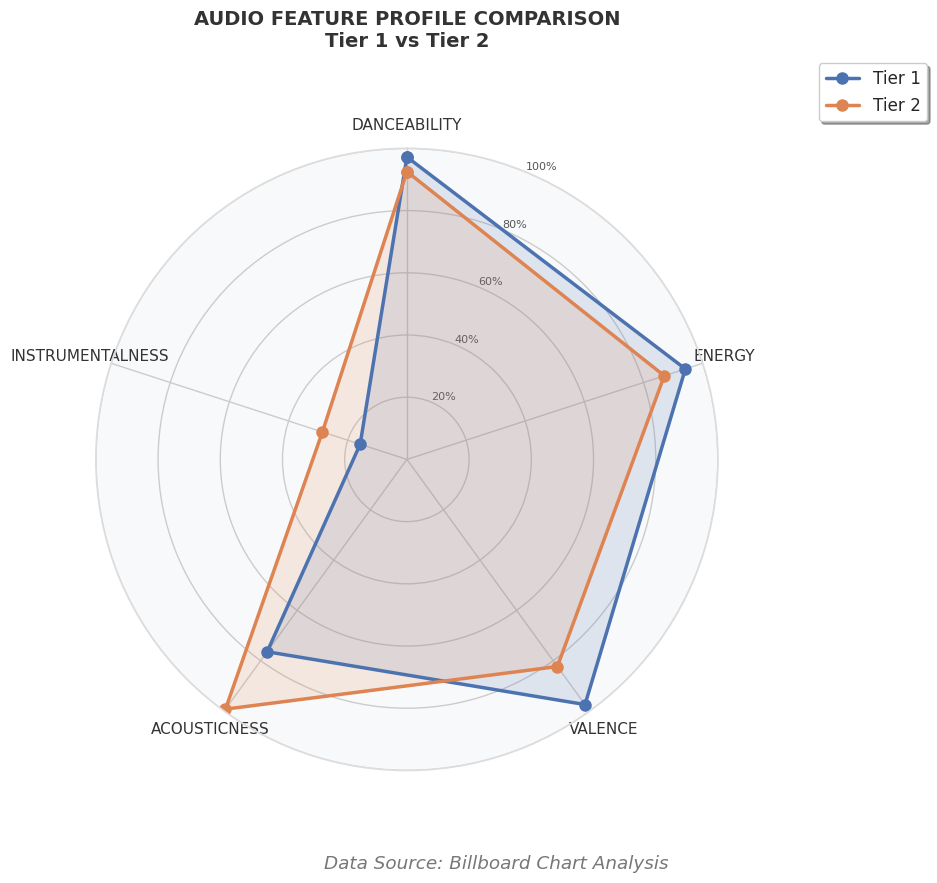

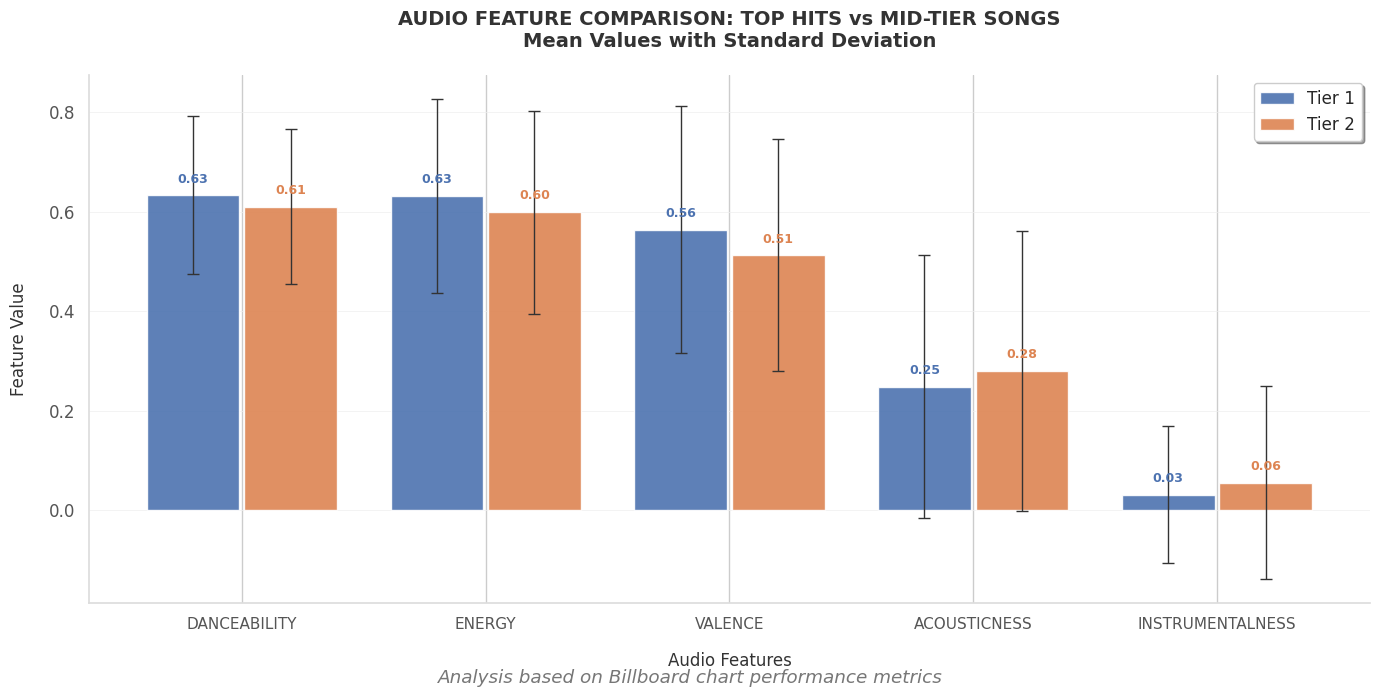


📊 STATISTICAL COMPARISON (TIER 1 vs TIER 2, excluding duration)


In [32]:
# Custom color palette
tier_colors = {'Tier 1': '#4C72B0', 'Tier 2': '#DD8452'}

# 1. Enhanced Radar Chart
def create_radar_chart():
    features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

    # Normalize values for radar chart (0-1 scale)
    norm_values = {}
    for feat in features:
        min_val = comparison.loc[:, (feat,)].min().min()
        max_val = comparison.loc[:, (feat,)].max().max()
        for tier in ['Tier 1', 'Tier 2']:
            norm_values[(feat, tier)] = (comparison.loc['mean', (feat, tier)] - min_val) / (max_val - min_val)

    # Radar chart setup
    N = len(features)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig = plt.figure(figsize=(10, 10), facecolor='white')
    ax = fig.add_subplot(111, polar=True, facecolor='#f8f9fa')

    # Draw axis lines
    ax.spines['polar'].set_color('#dddddd')
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], color='#555555', size=8)

    # Plot data
    for tier in ['Tier 1', 'Tier 2']:
        values = [norm_values[(feat, tier)] for feat in features]
        values += values[:1]
        ax.plot(angles, values, linewidth=2.5, linestyle='solid',
                color=tier_colors[tier], label=tier, marker='o', markersize=8)
        ax.fill(angles, values, color=tier_colors[tier], alpha=0.15)

    # Customize labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([f.upper() for f in features], size=11, color='#333333')
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    # Title and legend
    plt.title('AUDIO FEATURE PROFILE COMPARISON\nTier 1 vs Tier 2',
             y=1.15, size=14, weight='bold', color='#333333')
    legend = plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15),
                       frameon=True, shadow=True)
    legend.get_frame().set_facecolor('white')

    # Add data source
    plt.figtext(0.5, 0.01, "Data Source: Billboard Chart Analysis",
               ha='center', color='#777777', style='italic')
    plt.tight_layout()
    plt.show()

# 2. Professional Bar Chart
def create_bar_chart():
    plt.figure(figsize=(14, 7), facecolor='white')
    features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

    x = np.arange(len(features))
    width = 0.38
    gap = 0.02

    # Custom bar style
    bar_style = {
        'linewidth': 1,
        'edgecolor': 'white',
        'alpha': 0.9
    }

    # Plot bars with error bars (std)
    for i, tier in enumerate(['Tier 1', 'Tier 2']):
        means = [comparison.loc['mean', (feat, tier)] for feat in features]
        stds = [comparison.loc['std', (feat, tier)] for feat in features]

        position = x + (i * (width + gap)) - (width + gap)/2
        plt.bar(position, means, width,
               color=tier_colors[tier],
               label=tier,
               yerr=stds,
               error_kw={'elinewidth': 1, 'ecolor': '#333333', 'capsize': 4},
               **bar_style)

        # Add value labels
        for j, val in enumerate(means):
            plt.text(position[j], val + 0.02, f'{val:.2f}',
                    ha='center', va='bottom',
                    color=tier_colors[tier],
                    weight='bold', size=9)

    # Customize axes
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#dddddd')
    ax.spines['bottom'].set_color('#dddddd')

    # Labels and title
    plt.xlabel('Audio Features', labelpad=15, size=12, color='#333333')
    plt.ylabel('Feature Value', labelpad=15, size=12, color='#333333')
    plt.title('AUDIO FEATURE COMPARISON: TOP HITS vs MID-TIER SONGS\nMean Values with Standard Deviation',
             pad=20, size=14, weight='bold', color='#333333')

    # X-axis customization
    plt.xticks(x, [f.upper() for f in features], size=11, color='#555555')
    plt.yticks(color='#555555')

    # Legend and grid
    plt.legend(frameon=True, shadow=True, facecolor='white')
    plt.grid(axis='y', color='#eeeeee', linestyle='-', linewidth=0.5)

    # Add annotations
    plt.figtext(0.5, 0.01, "Analysis based on Billboard chart performance metrics",
               ha='center', color='#777777', style='italic')

    plt.tight_layout()
    plt.show()

# 3. Updated Comparison Table (excluding 'duration_sec' row and using high-contrast colormaps)
def show_comparison_table():
    filtered_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']
    filtered_comparison = comparison.loc[:, pd.IndexSlice[filtered_features, ['Tier 1', 'Tier 2']]]

    # Drop 'duration_sec' if it still exists in the index
    filtered_comparison = filtered_comparison.drop(index='duration_sec', errors='ignore')

    # Custom high-contrast colormaps
    blues_high_contrast = LinearSegmentedColormap.from_list("blues_hc", ['#dceefb', '#0f609b'])
    oranges_high_contrast = LinearSegmentedColormap.from_list("oranges_hc", ['#ffe8d1', '#c05621'])

    print("\n📊 STATISTICAL COMPARISON (TIER 1 vs TIER 2, excluding duration)")
    display(filtered_comparison.style
            .background_gradient(cmap=blues_high_contrast, subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Tier 1']])
            .background_gradient(cmap=oranges_high_contrast, subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Tier 2']])
            .format("{:.3f}"))


# Generate visualizations
create_radar_chart()
create_bar_chart()
show_comparison_table()

<ipython-input-34-5044e1744c1c>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tier', frameon=True)
<ipython-input-34-5044e1744c1c>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tier', frameon=True)
<ipython-input-34-5044e1744c1c>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tier', frameon=True)
<ipython-input-34-5044e1744c1c>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tier', frameon=True)


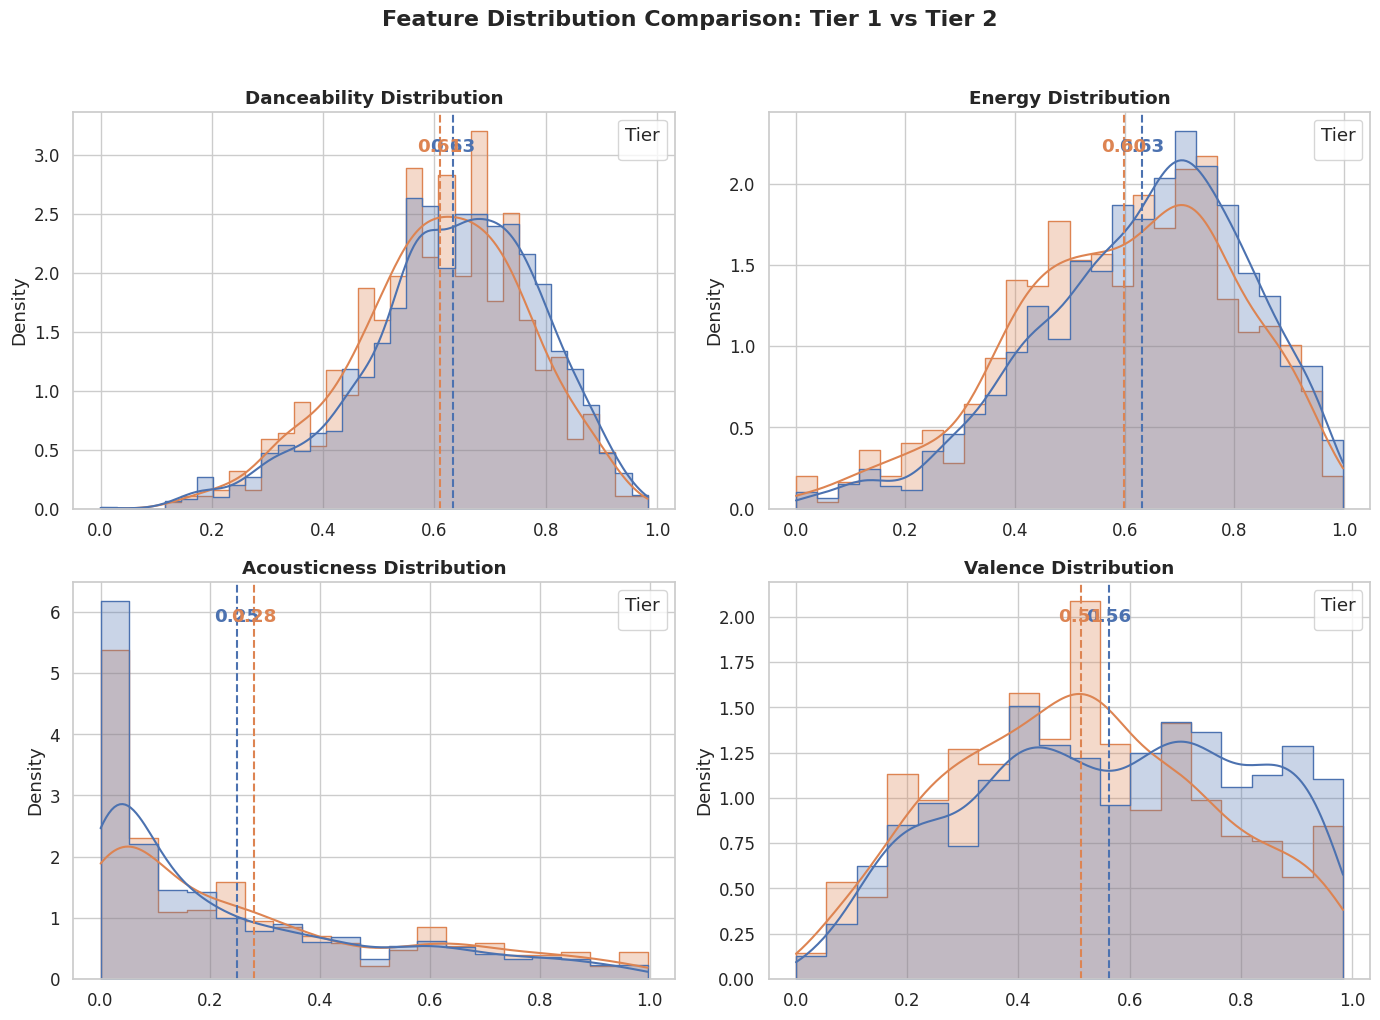

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


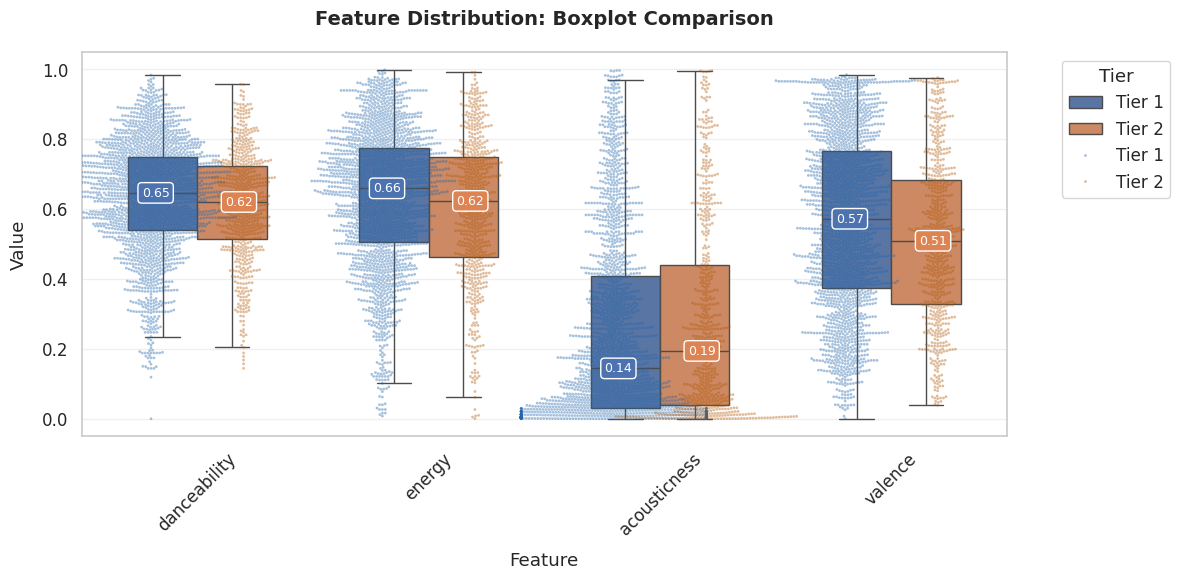

In [34]:
# Select most meaningful features for distribution analysis
features = ['danceability', 'energy', 'acousticness', 'valence']

# 1. Combined Histograms with KDE
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=df_billboard,
        x=feature,
        hue='tier',
        element='step',
        stat='density',
        common_norm=False,
        kde=True,
        alpha=0.3,
        hue_order=['Tier 1', 'Tier 2'],
        palette=['#4C72B0', '#DD8452']
    )
    plt.title(f'{feature.capitalize()} Distribution', fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Density')
    plt.legend(title='Tier', frameon=True)

    # Add mean markers
    for tier, color in zip(['Tier 1', 'Tier 2'], ['#4C72B0', '#DD8452']):
        mean_val = comparison.loc['mean', (feature, tier)]
        plt.axvline(mean_val, color=color, linestyle='--', linewidth=1.5)
        plt.text(mean_val, plt.ylim()[1]*0.9, f'{mean_val:.2f}',
                color=color, ha='center', fontweight='bold')

plt.suptitle('Feature Distribution Comparison: Tier 1 vs Tier 2',
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Enhanced Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=pd.melt(df_billboard[df_billboard['tier'].isin(['Tier 1', 'Tier 2'])],
                id_vars=['tier'],
                value_vars=features),
    x='variable',
    y='value',
    hue='tier',
    hue_order=['Tier 1', 'Tier 2'],
    palette=['#4C72B0', '#DD8452'],
    linewidth=1,
    width=0.6,
    showfliers=False  # Cleaner visualization without outliers
)

# Add swarm plot for actual data points
sns.swarmplot(
    data=pd.melt(df_billboard[df_billboard['tier'].isin(['Tier 1', 'Tier 2'])],
                id_vars=['tier'],
                value_vars=features),
    x='variable',
    y='value',
    hue='tier',
    hue_order=['Tier 1', 'Tier 2'],
    palette=['#2166ac', '#b35806'],
    size=2,
    alpha=0.4,
    dodge=True
)

# Customize plot
plt.title('Feature Distribution: Boxplot Comparison',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Feature', labelpad=10)
plt.ylabel('Value', labelpad=10)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), title='Tier')
plt.grid(axis='y', alpha=0.3)

# Add annotations
medians = df_billboard.groupby('tier')[features].median().T
for i, feature in enumerate(features):
    for j, tier in enumerate(['Tier 1', 'Tier 2']):
        plt.text(i + (-0.18 if j == 0 else 0.18),
                medians.loc[feature, tier],
                f'{medians.loc[feature, tier]:.2f}',
                color='white',
                fontsize=9,
                ha='center',
                va='center',
                bbox=dict(facecolor='#4C72B0' if j == 0 else '#DD8452',
                         boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

<ipython-input-36-bbbf259176f2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['success_category'] = np.where(
<ipython-input-36-bbbf259176f2>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-36-bbbf259176f2>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-36-bbbf259176f2>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

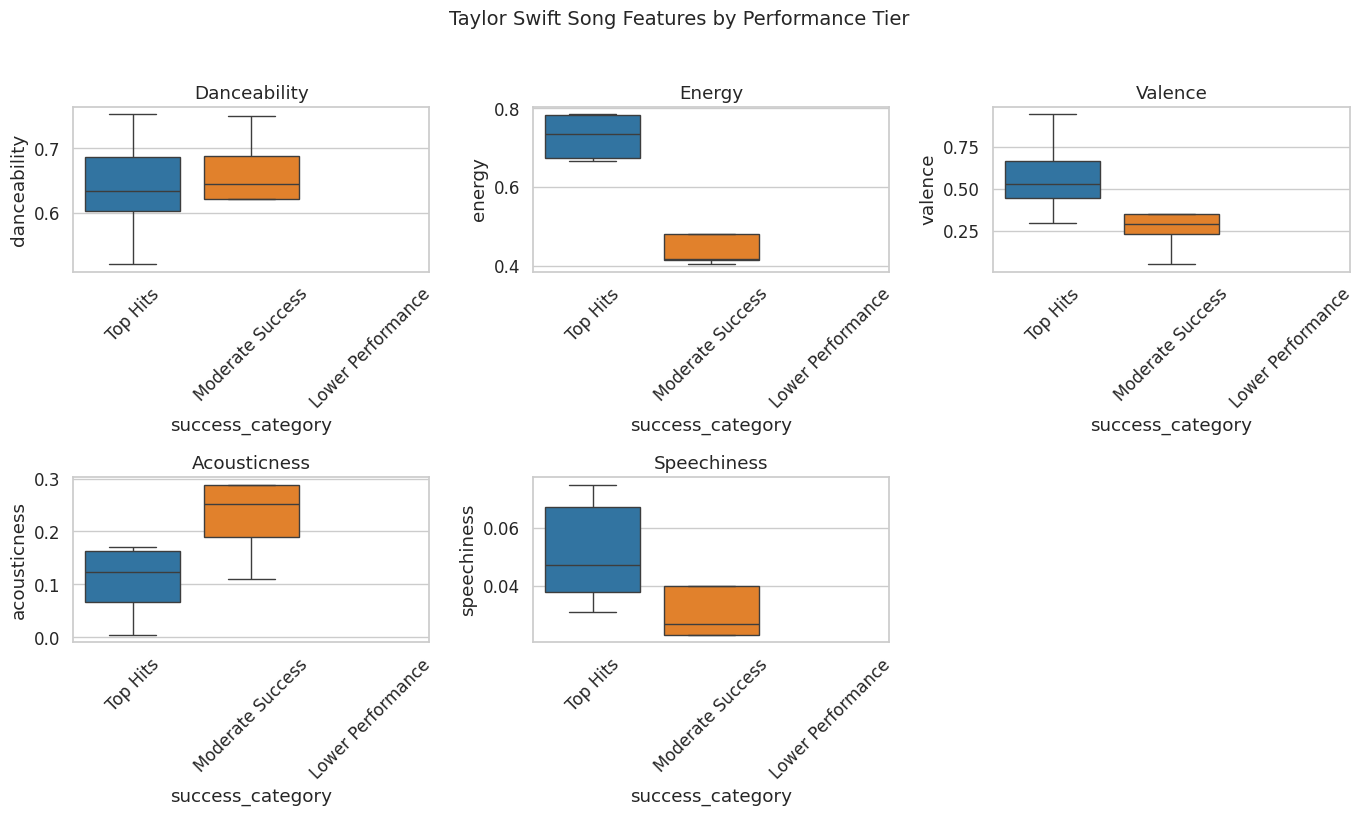

<Figure size 1400x600 with 0 Axes>

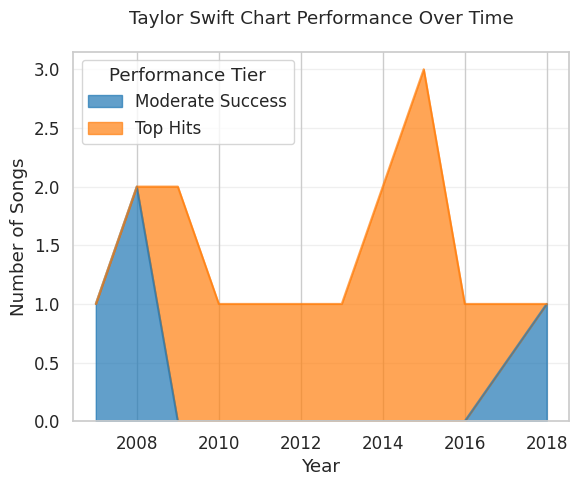

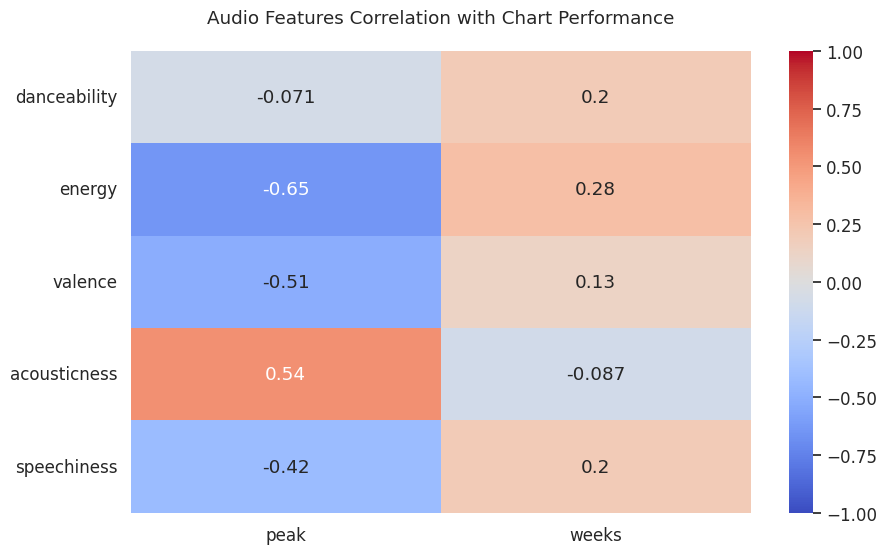

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

# Filter Taylor Swift songs
ts_df = df_billboard[df_billboard['artist'].str.contains('Taylor Swift', case=False)]

# Classify songs (example - adjust based on your peak/weeks data)
ts_df['success_category'] = np.where(
    (ts_df['peak'] <= 10) & (ts_df['weeks'] >= 10),
    'Top Hits',
    np.where(
        (ts_df['peak'] <= 50) & (ts_df['weeks'] >= 5),
        'Moderate Success',
        'Lower Performance'
    )
)

# Select key features for analysis
features = ['danceability', 'energy', 'valence', 'acousticness', 'speechiness']

# 1. Radar Chart Comparison
def create_radar_chart():
    categories = features
    N = len(categories)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig = plt.figure(figsize=(10, 10), facecolor='white')
    ax = fig.add_subplot(111, polar=True)

    # Normalize values
    for cat in ['Top Hits', 'Moderate Success', 'Lower Performance']:
        subset = ts_df[ts_df['success_category'] == cat]
        values = [subset[feat].mean() for feat in features]
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=cat)
        ax.fill(angles, values, alpha=0.1)

    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], [f.upper() for f in features])
    plt.title('Taylor Swift Audio Signature\nBy Chart Performance', pad=40, fontsize=14)
    plt.legend(bbox_to_anchor=(1.3, 1.1))
    plt.show()

# 2. Feature Distribution Comparison
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        data=ts_df,
        x='success_category',
        y=feature,
        order=['Top Hits', 'Moderate Success', 'Lower Performance'],
        palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
        showfliers=False
    )
    plt.title(feature.capitalize())
    plt.xticks(rotation=45)
plt.suptitle('Taylor Swift Song Features by Performance Tier', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# 3. Success Timeline Analysis
plt.figure(figsize=(14, 6))
ts_success = ts_df.groupby(['year', 'success_category']).size().unstack()
ts_success.plot(
    kind='area',
    stacked=True,
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],
    alpha=0.7
)
plt.title('Taylor Swift Chart Performance Over Time', pad=20)
plt.ylabel('Number of Songs')
plt.xlabel('Year')
plt.legend(title='Performance Tier')
plt.grid(axis='y', alpha=0.3)
plt.show()

# 4. Feature Correlation with Success
plt.figure(figsize=(10, 6))
corr_data = ts_df[features + ['peak', 'weeks']].corr()
sns.heatmap(
    corr_data[['peak', 'weeks']].drop(['peak', 'weeks']),
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1
)
plt.title('Audio Features Correlation with Chart Performance', pad=20)
plt.show()